# K_mean


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


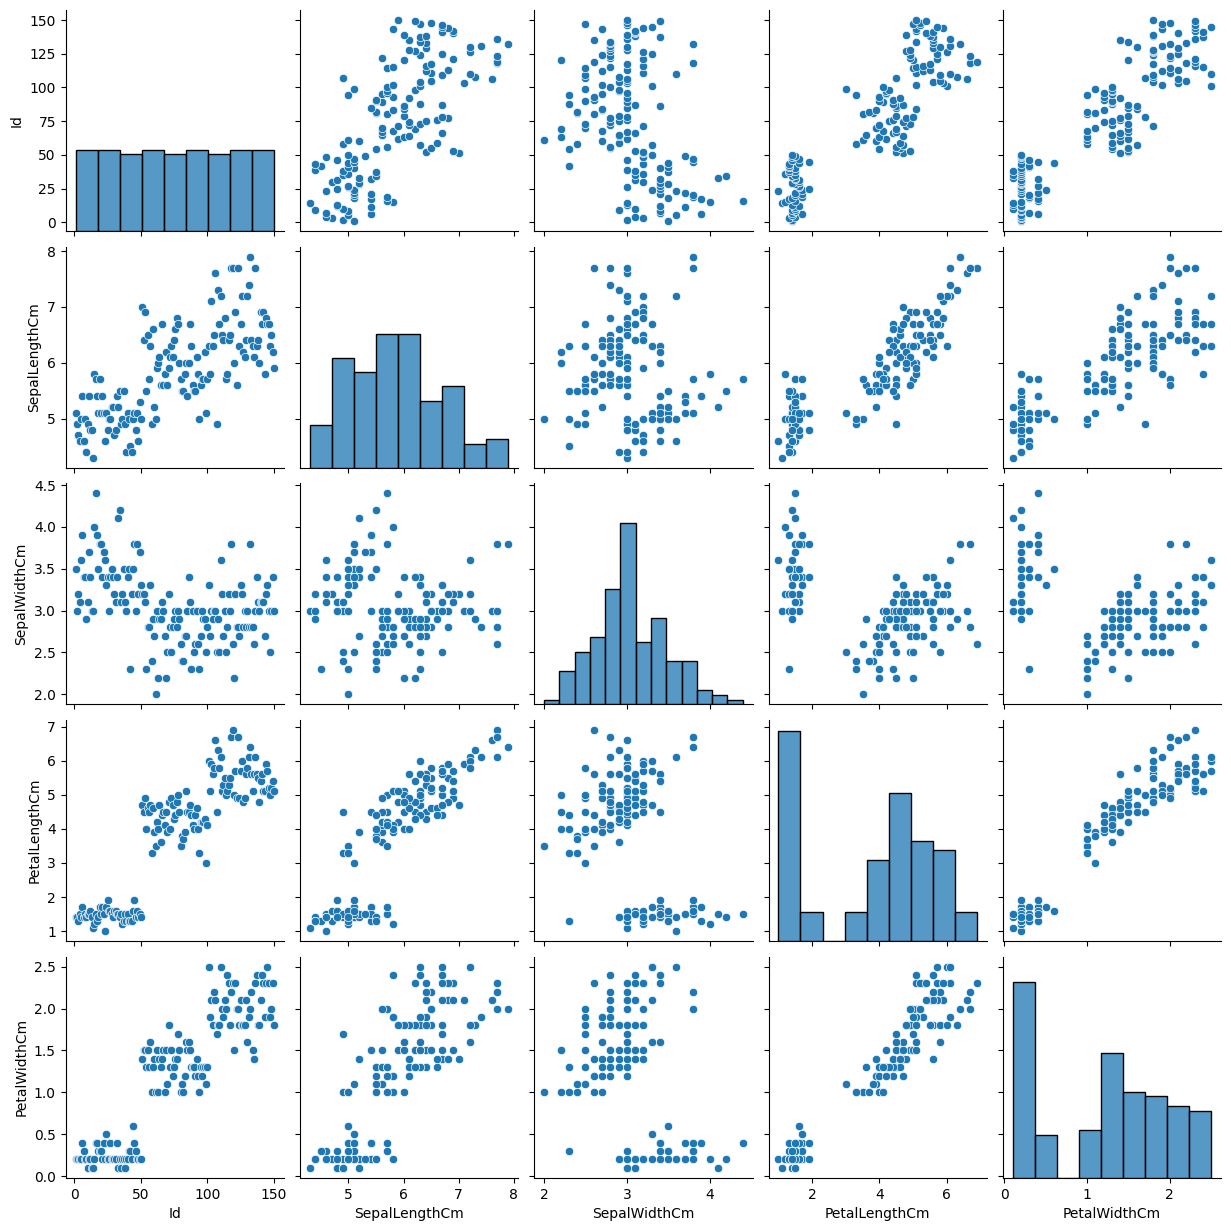

In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

wscc=[]

for i in range(2,21):
  knn = KMeans(n_clusters=i,init='k-means++')
  knn.fit(df)
  wscc.append(knn.inertia_)


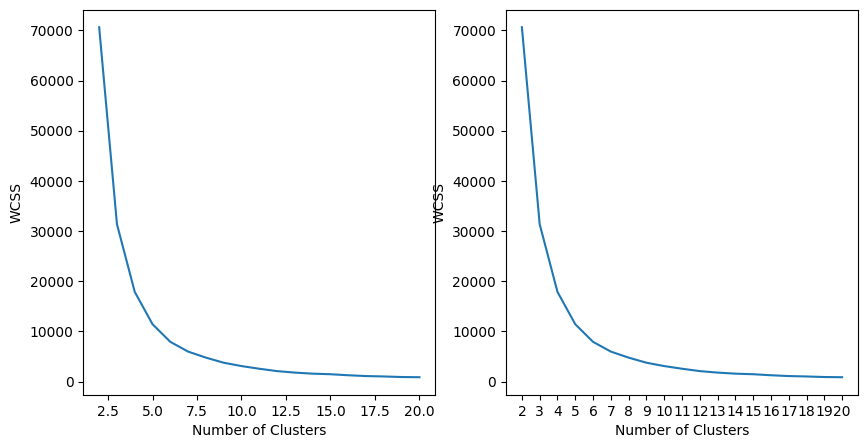

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([i for i in range(2,21)],wscc)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.subplot(1,2,2)
plt.plot([i for i in range(2,21)],wscc)
plt.xlabel('Number of Clusters')
plt.xticks([i for i in range(2,21)])
plt.ylabel('WCSS')
plt.show()

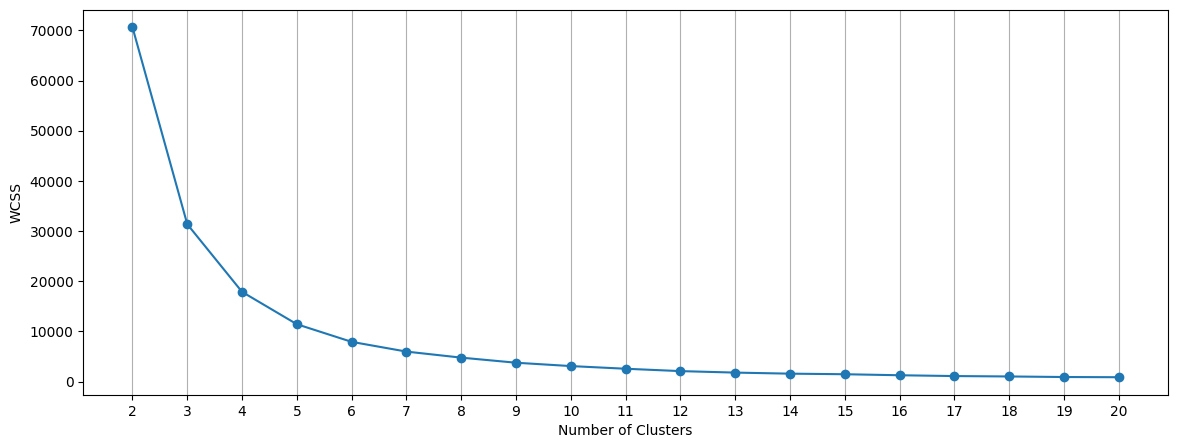

In [ ]:
plt.figure(figsize=(14,5))
plt.plot([i for i in range(2,21)],wscc,marker='o')
plt.xlabel('Number of Clusters')
plt.xticks([i for i in range(2,21)])
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show()

In [ ]:
kmn = KMeans(n_clusters=3)
kmn.fit(df)

KMeans(n_clusters=3)

In [ ]:
kmm = kmn.predict(df)

In [ ]:
df['Cluster'] = kmm

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict,Cluster
0,1,5.1,3.5,1.4,0.2,2,0
1,2,4.9,3.0,1.4,0.2,2,0
2,3,4.7,3.2,1.3,0.2,2,0
3,4,4.6,3.1,1.5,0.2,2,0
4,5,5.0,3.6,1.4,0.2,2,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,1
146,147,6.3,2.5,5.0,1.9,0,1
147,148,6.5,3.0,5.2,2.0,0,1
148,149,6.2,3.4,5.4,2.3,0,1


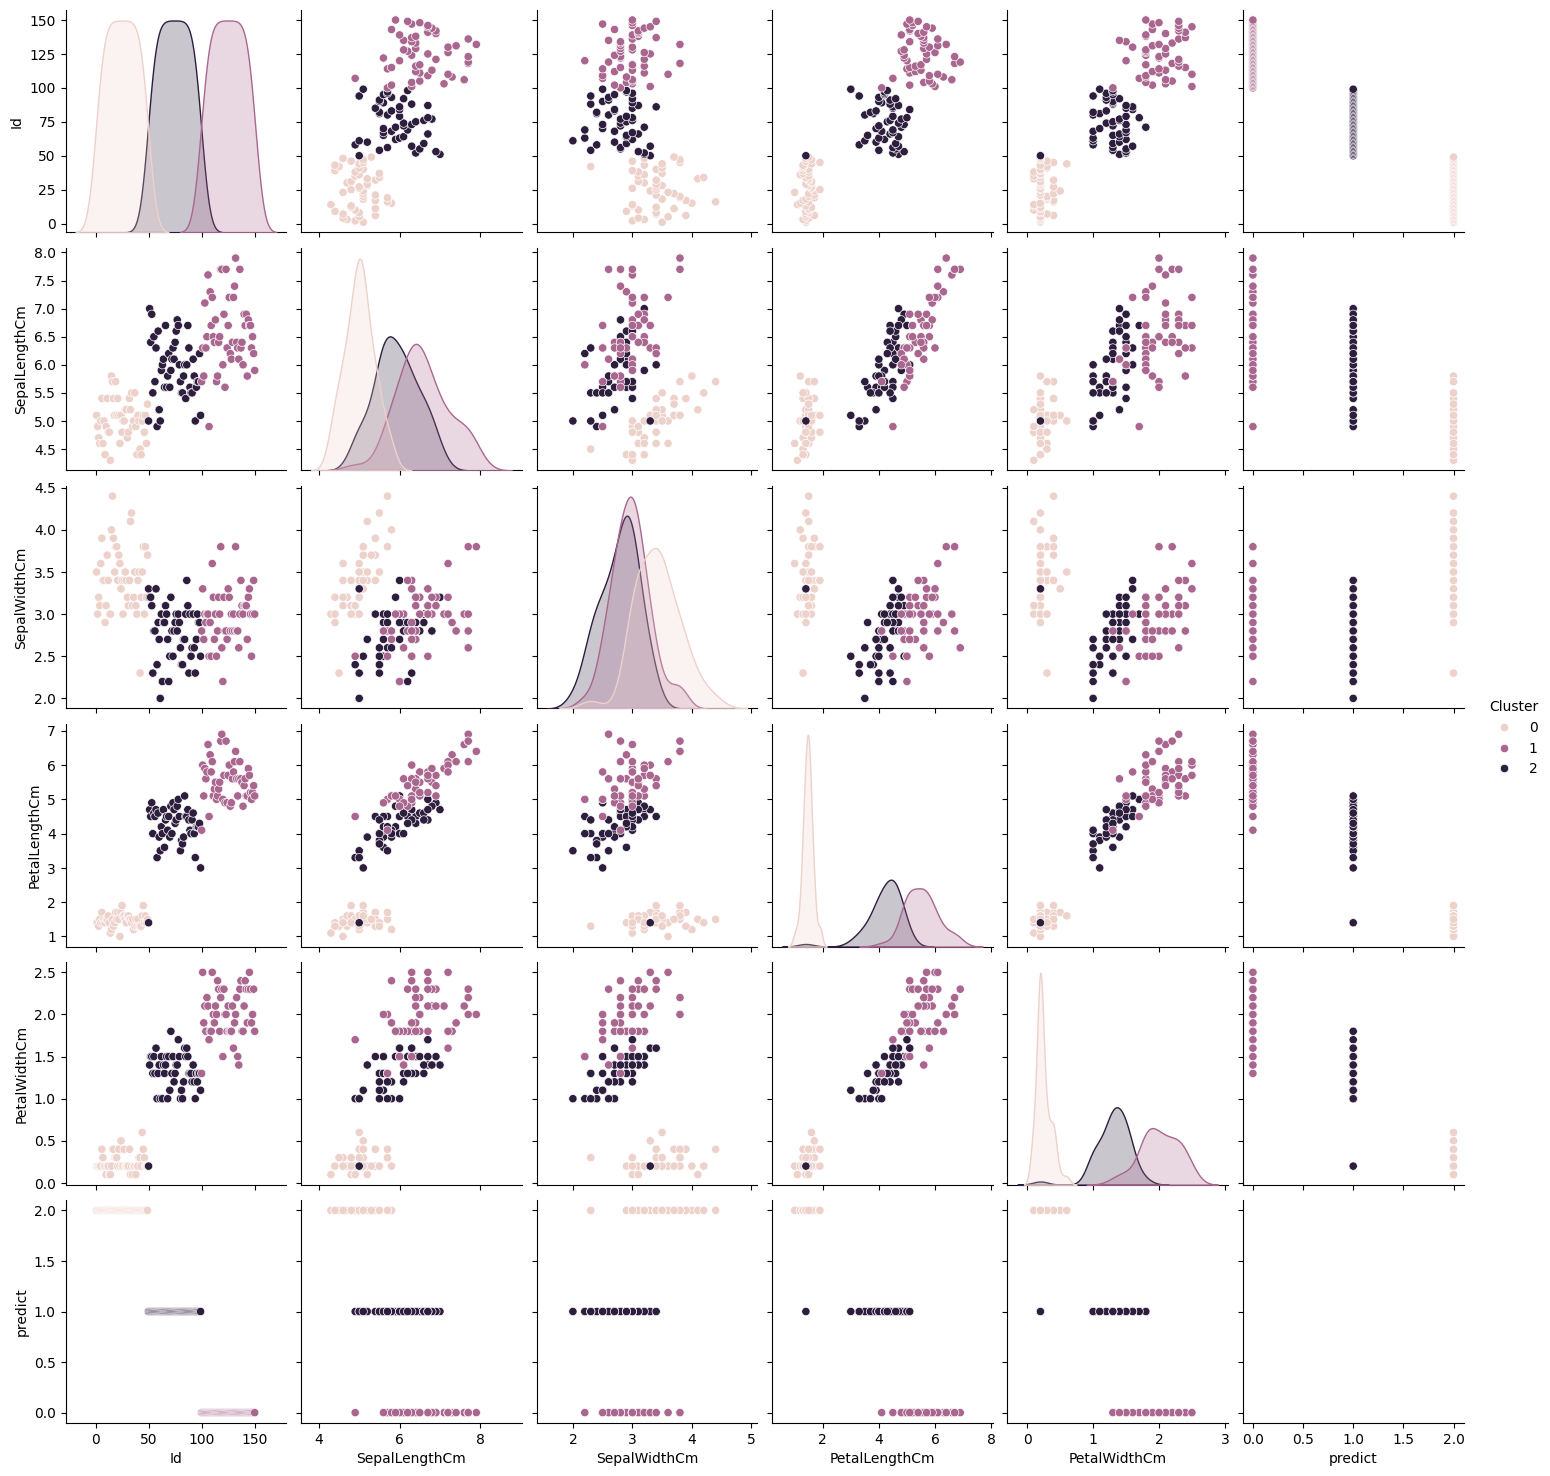

In [ ]:
sns.pairplot(data=df,hue='Cluster')
plt.show()

# Hierachical


In [67]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


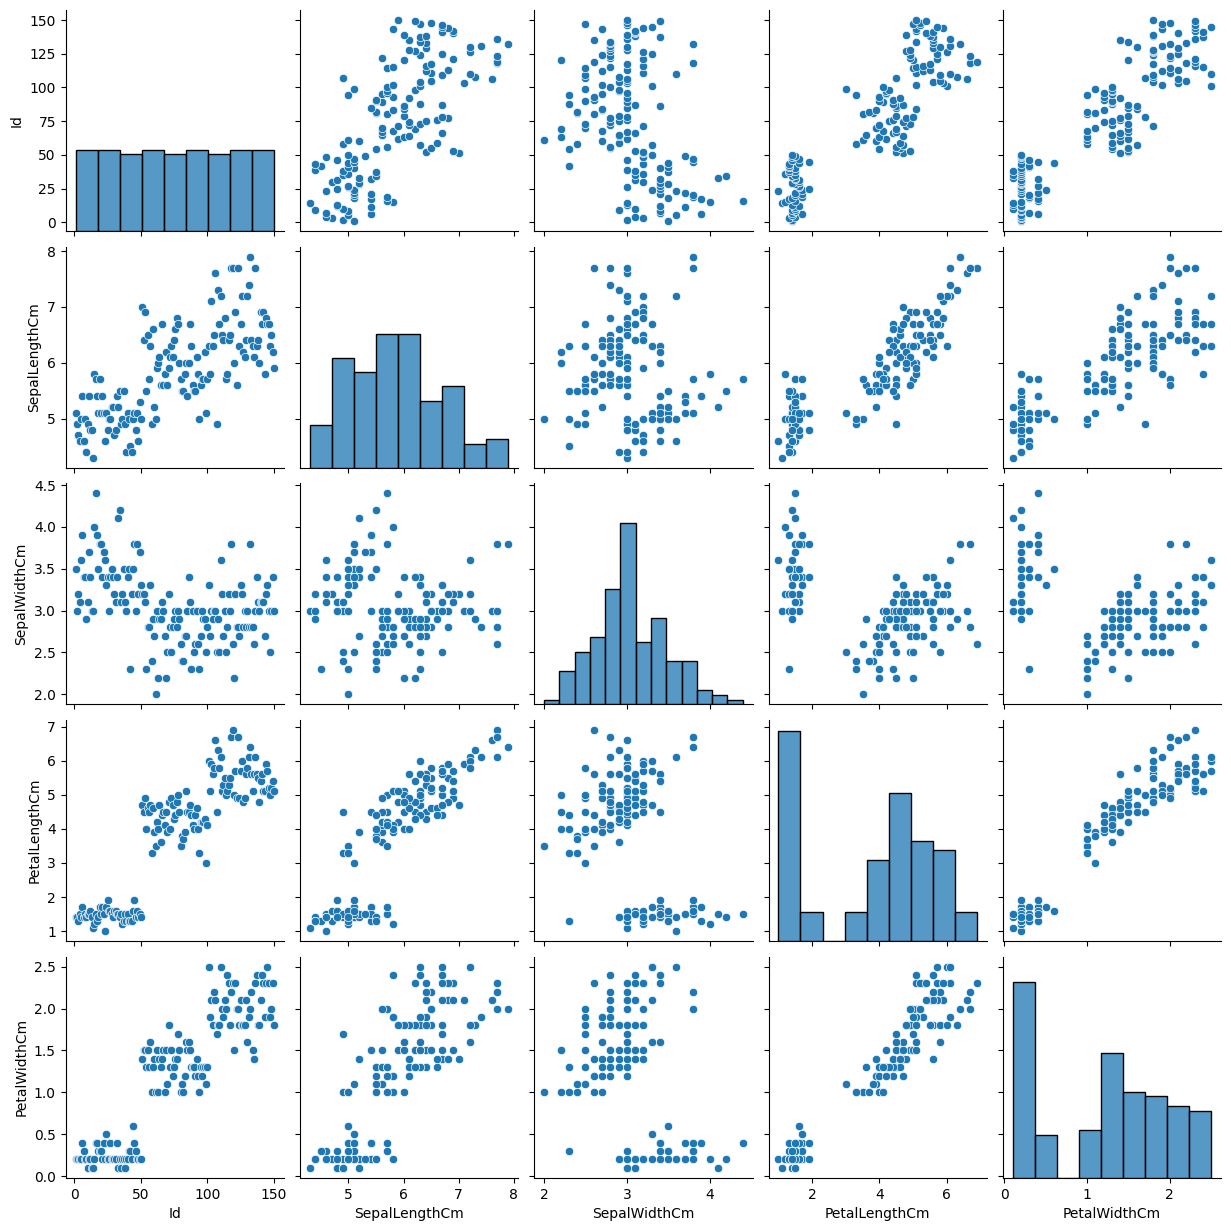

In [68]:
sns.pairplot(data=dataset)
plt.show()

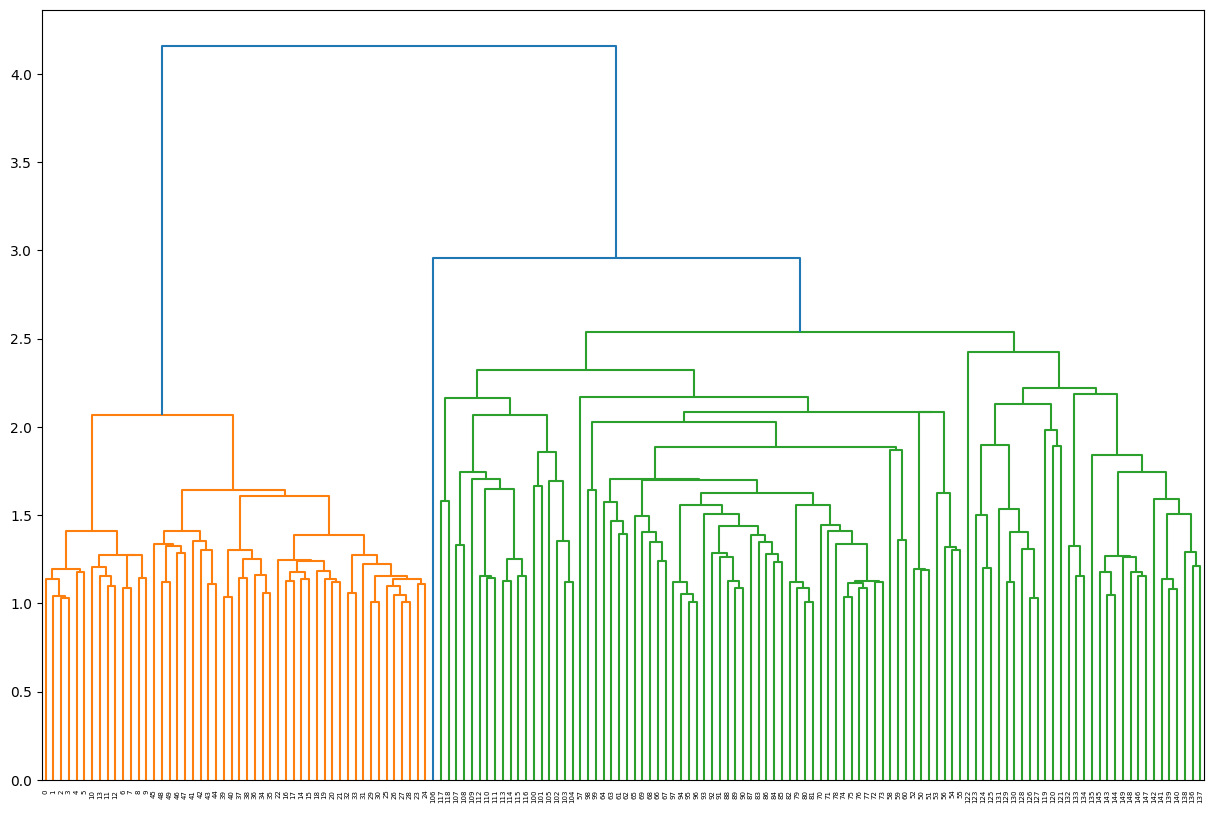

In [79]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))
shc.dendrogram(shc.linkage(dataset,method='single',metric='euclidean'))
plt.savefig("demo.jpg")
plt.show()

In [85]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,linkage='single')
dataset['predict']= hc.fit_predict(dataset)

In [86]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


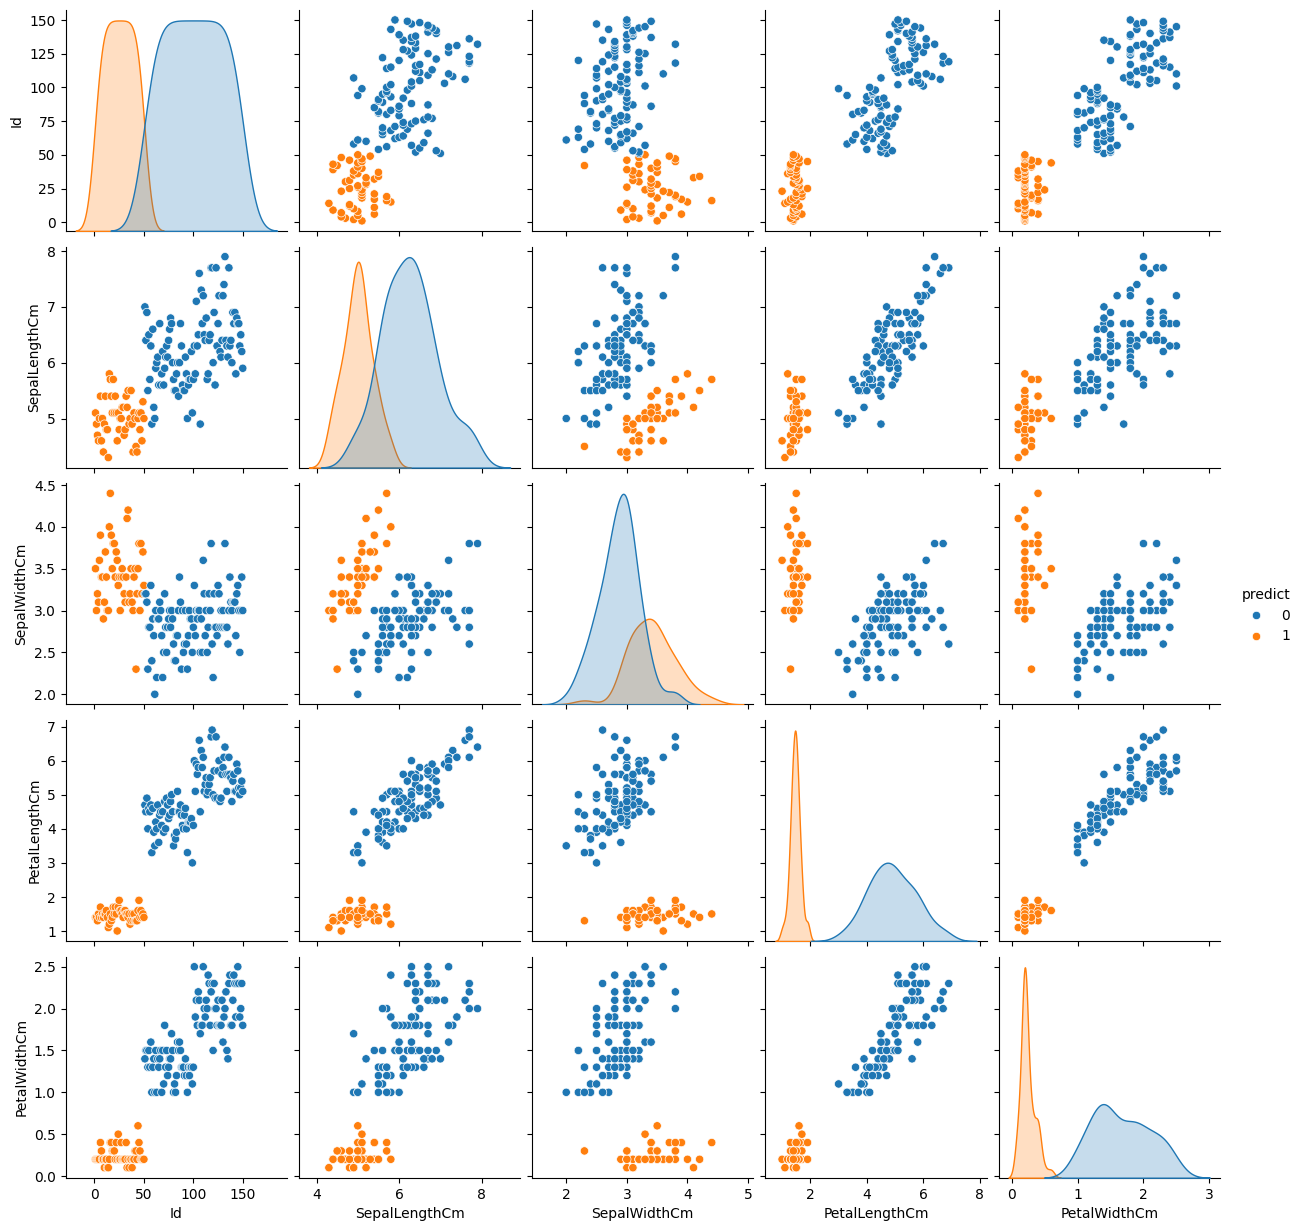

In [87]:
sns.pairplot(data=dataset,hue='predict')
plt.show()

# DBSCAN

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons


In [90]:
x,y = make_moons(n_samples=250, noise=0.05, random_state=0)

In [101]:
data = {"Data1": x[:, 0], "Data2": x[:, 1], "output": y}
dataset = pd.DataFrame(data)

print(dataset.head())

      Data1     Data2  output
0  1.714638 -0.078157       1
1 -1.019583  0.030322       0
2 -0.635919  0.719617       0
3  0.318124 -0.195702       1
4  0.325713 -0.147306       1


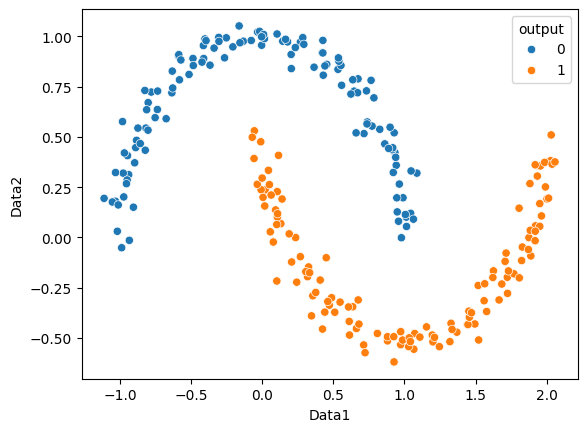

In [102]:
sns.scatterplot(x="Data1", y="Data2", hue="output", data=dataset)
plt.show()

In [131]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1,min_samples=10)
dataset["predict"] = db.fit_predict(dataset)

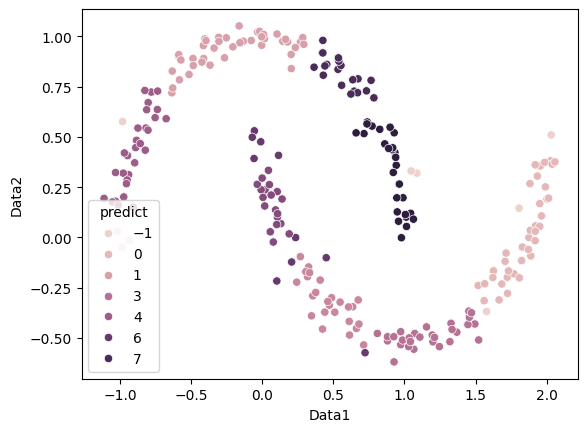

In [132]:
sns.scatterplot(x="Data1", y="Data2", hue="predict", data=dataset)
plt.show()

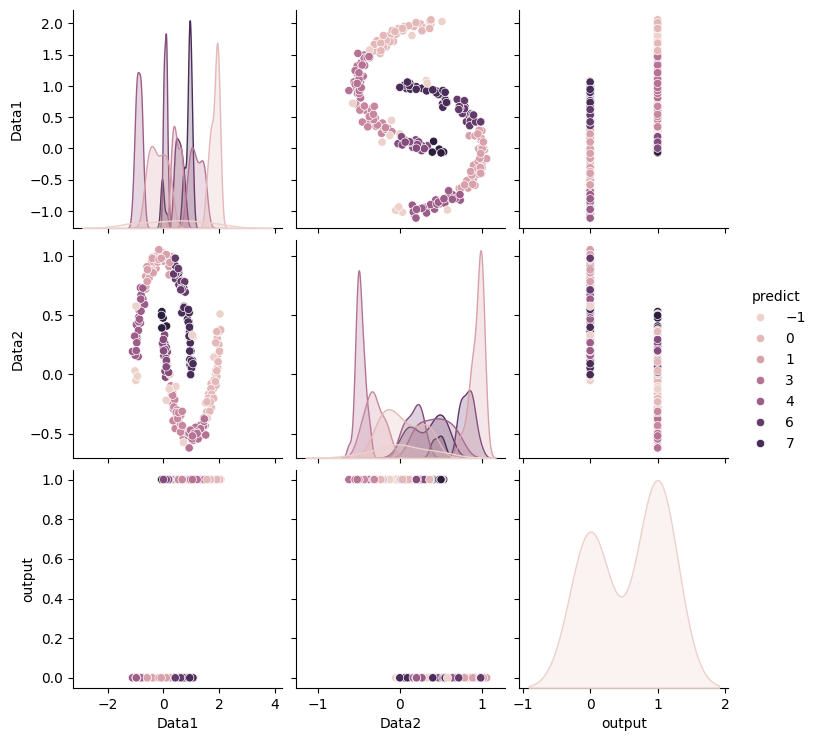

In [128]:
sns.pairplot(data=dataset,hue="predict")
plt.show()